In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

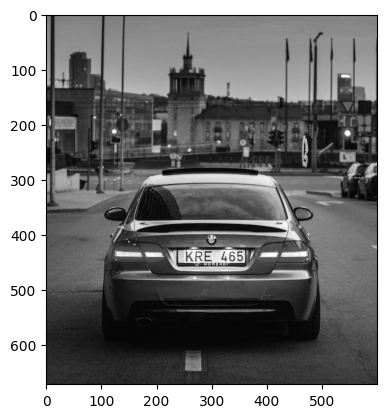

In [2]:
img_grises_sin_ecualizar=cv.imread(r'ImagenesMuestra\CochesVarios\coche01.JPEG',cv.IMREAD_GRAYSCALE)
plt.imshow(img_grises_sin_ecualizar,  cmap='gray')

<BarContainer object of 256 artists>

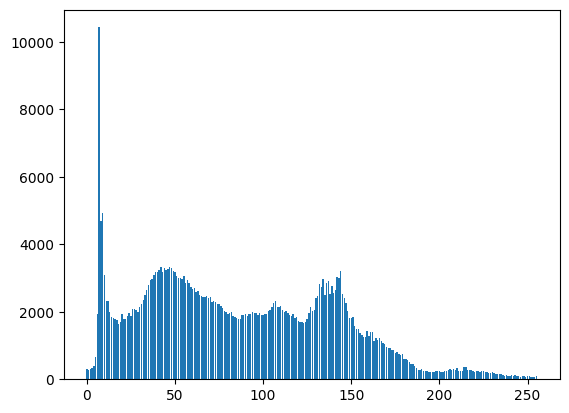

In [3]:
#Inicializa el histograma
hist_entrada_manual = [0 for i in range(0,256)]

#Obtiene las dimensiones de la imagen
filas_ecu, cols_ecu = img_grises_sin_ecualizar.shape

#Conteo de niveles de gris
for i in range(filas_ecu):
    for j in range(cols_ecu):

        color = img_grises_sin_ecualizar[i,j]
        hist_entrada_manual[color]+=1
#Graficar histograma de la imagen
plt.bar(range(256),hist_entrada_manual)

<BarContainer object of 256 artists>

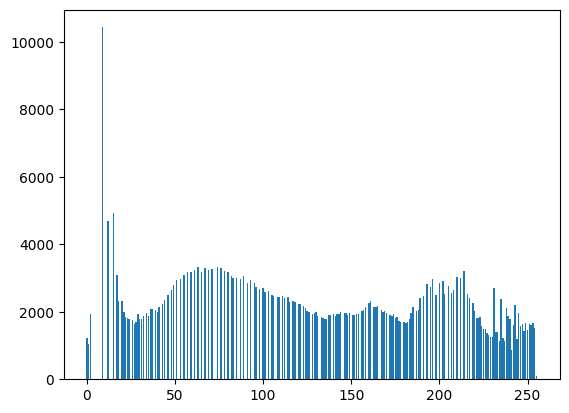

In [4]:
# Convertir histograma a numpy array para facilitar cálculos
hist_entrada = np.array(hist_entrada_manual)

# Calcular CDF (cumulative distribution function)
pdf = hist_entrada / (filas_ecu * cols_ecu)#PDF (probability distribution function)
cdf = np.cumsum(pdf)

# Normalizar la CDF
cdf_normalized = cdf * 255 / cdf[-1]  # Escalar CDF al rango [0, 255]

# Crear una imagen de salida ecualizada mediante reasignación de los valores de los píxeles
img_grises_ecualizada_manual = np.zeros_like(img_grises_sin_ecualizar)
for i in range(filas_ecu):
    for j in range(cols_ecu):
        img_grises_ecualizada_manual[i, j] = cdf_normalized[img_grises_sin_ecualizar[i, j]]

# Calcular el histograma de la imagen ecualizada MANUAL
hist_salida_ecu_manual = [0 for i in range(256)]
for i in range(filas_ecu):
    for j in range(cols_ecu):
        color = img_grises_ecualizada_manual[i, j]
        hist_salida_ecu_manual[int(color)] += 1
plt.bar(range(256),hist_salida_ecu_manual)

#plt.imshow(img_grises_ecualizada_manual, cmap='gray')

<BarContainer object of 256 artists>

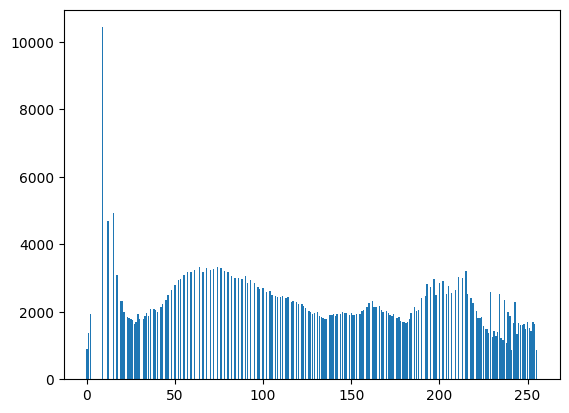

In [5]:
# Ecualización de la imagen de entrada utilizando OpenCV
img_grises_ecu_salida_opencv=cv.equalizeHist(img_grises_sin_ecualizar)

#Cálculo y visualización del histograma de imagen de salida (ecualizada) con método OpenCV
hist_salida_opencv = cv.calcHist([img_grises_ecu_salida_opencv], [0], None, [256], [0, 256])
hist_salida_opencv = hist_salida_opencv.ravel()  # Aplana el array
plt.bar(range(256),hist_salida_opencv)

#plt.imshow(img_grises_ecu_salida_opencv,  cmap='gray')

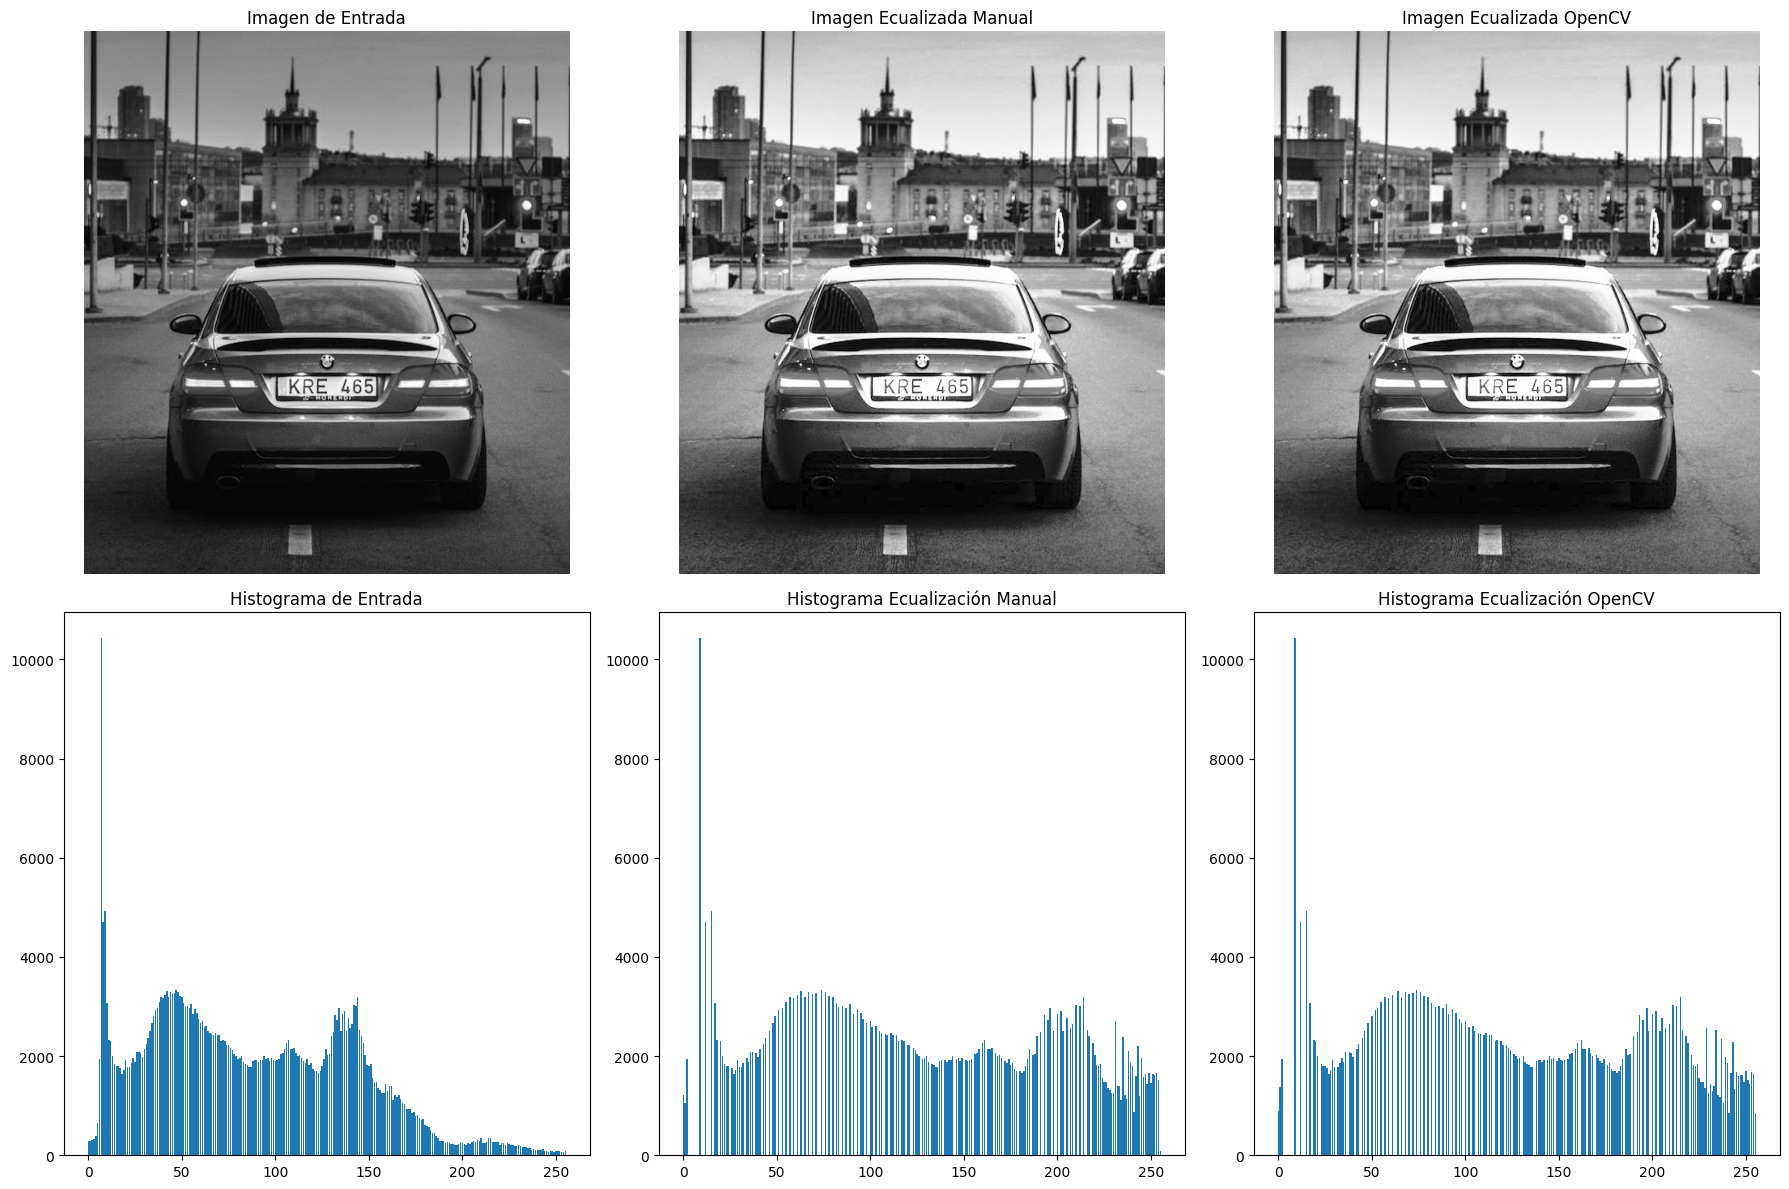

In [6]:
# Crear el visual con 6 gráficos en 2 filas y 3 columnas
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Imagen de entrada
axs[0, 0].imshow(img_grises_sin_ecualizar, cmap='gray')
axs[0, 0].set_title('Imagen de Entrada')
axs[0, 0].axis('off')

# Histograma de entrada
axs[1, 0].bar(range(256), hist_entrada_manual)
axs[1, 0].set_title('Histograma de Entrada')

# Imagen ecualizada manualmente
axs[0, 1].imshow(img_grises_ecualizada_manual, cmap='gray')
axs[0, 1].set_title('Imagen Ecualizada Manual')
axs[0, 1].axis('off')

# Histograma de la ecualización manual
axs[1, 1].bar(range(256), hist_salida_ecu_manual)
axs[1, 1].set_title('Histograma Ecualización Manual')

# Imagen ecualizada con OpenCV
axs[0, 2].imshow(img_grises_ecu_salida_opencv, cmap='gray')
axs[0, 2].set_title('Imagen Ecualizada OpenCV')
axs[0, 2].axis('off')

# Histograma de la ecualización con OpenCV
axs[1, 2].bar(range(256), hist_salida_opencv)
axs[1, 2].set_title('Histograma Ecualización OpenCV')

plt.tight_layout()
plt.show()